## Ground Truth Test

In [2]:
import torch
import torchvision.transforms as transforms               
from torchvision.datasets import CIFAR10       
from torch.utils.data import DataLoader
import detectors
import timm
from src.temperature_scaling import ModelWithTemperature
from src.cifar10h import aps_cifar10h_hist, raps_cifar10h_hist, saps_cifar10h_hist, aps_cifar10h_scatter, raps_cifar10h_scatter, saps_cifar10h_scatter


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# load fine-tuned model
model = timm.create_model("resnet18_cifar10", pretrained=True)
model.to(device)

# reprocess the images from CIFAR10
data_transform = transforms.Compose([
    transforms.ToTensor(),          # transfer to tensor
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])  # normalize
])
# load images from CIFAR10
dataset = CIFAR10(root="../data", train=False, download=True, transform=data_transform)

# Temperature Scaling
temp_scal_loader = DataLoader(dataset, batch_size=32, shuffle=True)
model = ModelWithTemperature(model, temperature=5.0).to(device)
model.set_temperature(temp_scal_loader)

model.eval()

# The number of times the experiment is going to be repeated
num_runs = 10

# error rate
alpha = 0.1

Files already downloaded and verified
Before temperature - NLL: 0.294, ECE: 0.040
Optimal temperature: 4.904
After temperature - NLL: 0.866, ECE: 0.463


APS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8694 ± 0.0035
Final Average Prediction Set Size: 0.97 ± 0.01
Final Average Coverage: 0.8946 ± 0.0038
Final Average Real Probability: 0.8665 ± 0.0038


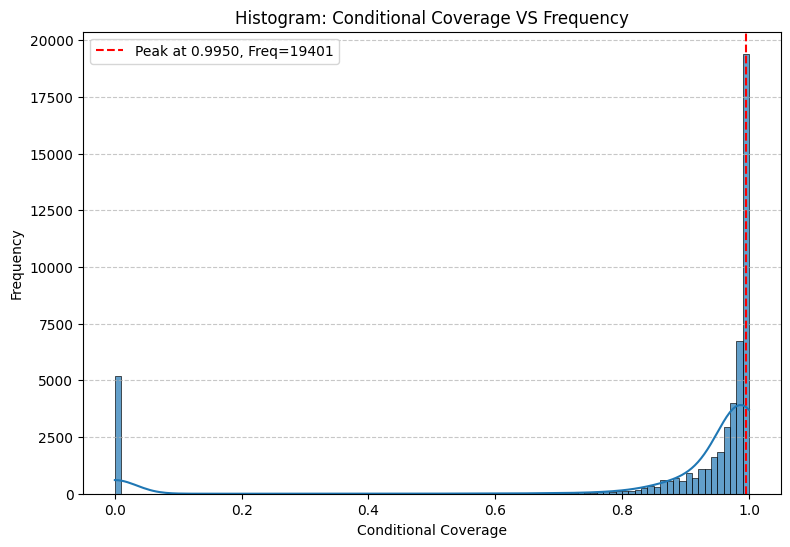

19401 (38.80%) samples reached the peak conditional coverage at 0.9950


In [3]:
aps_cifar10h_hist(model, dataset, device, num_runs, alpha)

RAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8710 ± 0.0034
Final Average Prediction Set Size: 0.92 ± 0.01
Final Average Coverage: 0.8943 ± 0.0038
Final Average Real Probability: 0.8605 ± 0.0040


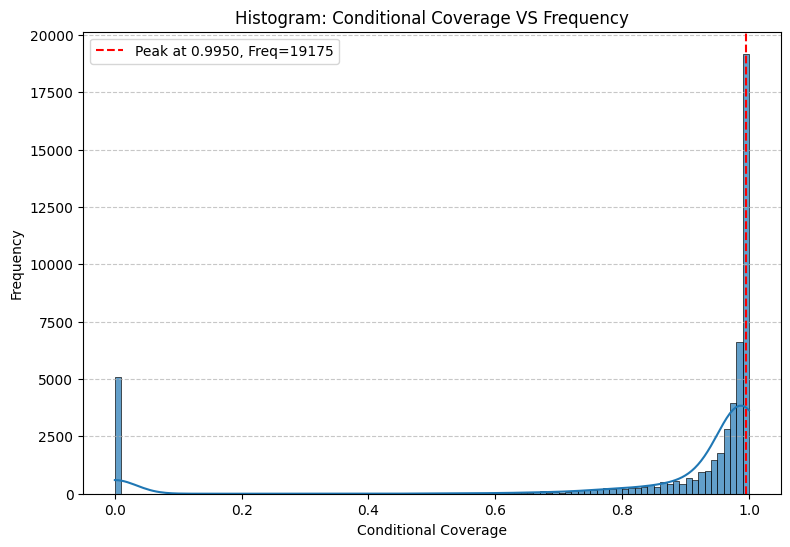

19175 (38.35%) samples reached the peak conditional coverage at 0.9950


In [4]:
raps_cifar10h_hist(model,dataset,device, lambda_=0.1, k_reg=1, num_runs=10, alpha=0.1)

SAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8751 ± 0.0044
Final Average Prediction Set Size: 0.91 ± 0.00
Final Average Coverage: 0.8978 ± 0.0044
Final Average Real Probability: 0.8622 ± 0.0044


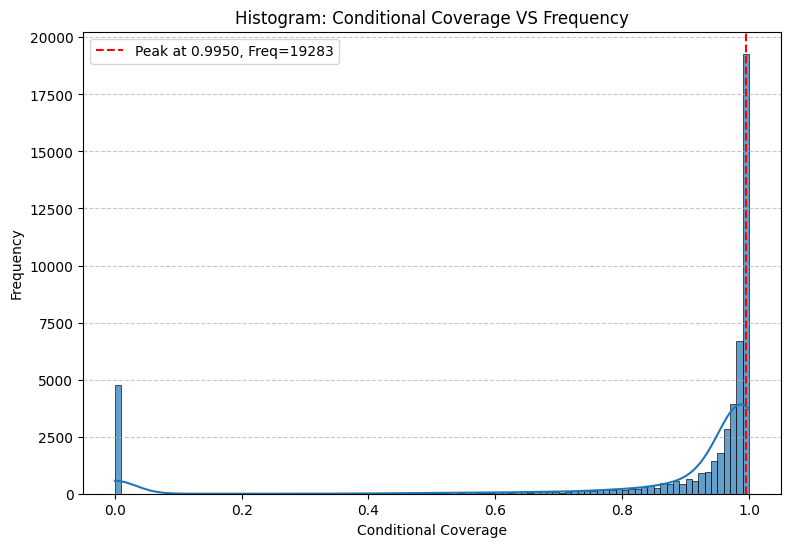

19283 (38.57%) samples reached the peak conditional coverage at 0.9950


In [5]:
saps_cifar10h_hist(model, dataset, device, lambda_=2.2, num_runs=10, alpha=0.1)

## Model Test

APS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.4832 ± 0.0024
Final Average Prediction Set Size: 1.26 ± 0.02
Final Average Coverage: 0.8963 ± 0.0051
Final Average Real Probability: 0.8680 ± 0.0051


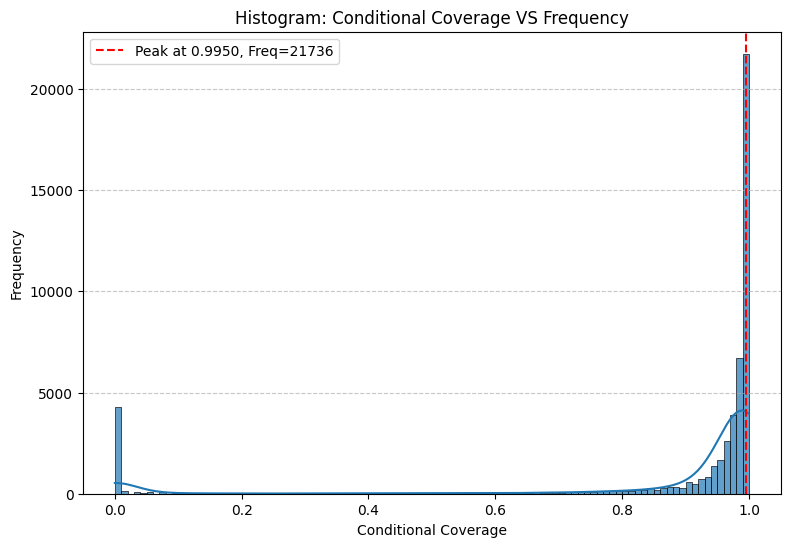

21736 (43.47%) samples reached the peak conditional coverage at 0.9950


In [3]:
aps_cifar10h_hist(model, dataset, device, num_runs, alpha, is_ground_truth=False)

APS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.4832 ± 0.0024
Final Average Prediction Set Size: 1.26 ± 0.02
Final Average Coverage: 0.8963 ± 0.0051
Final Average Real Probability: 0.8680 ± 0.0051


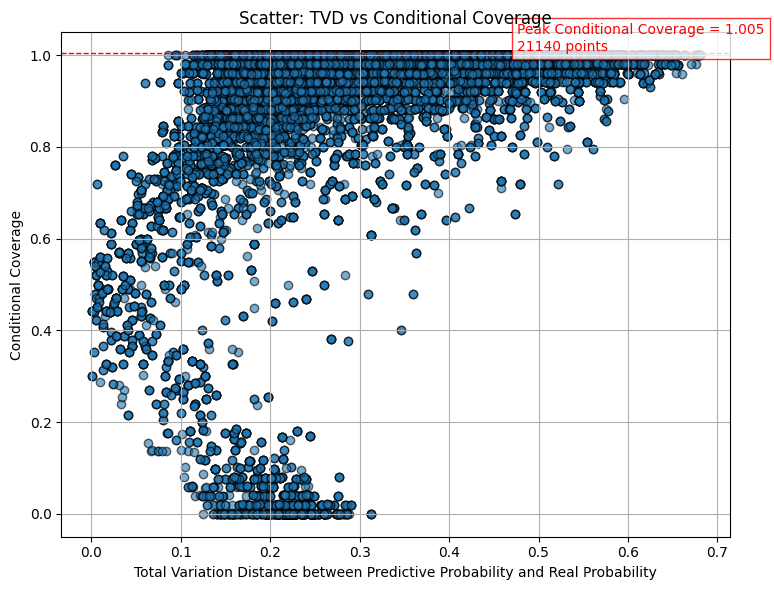

Peak Conditional Coverage = 1.005, with 21140 samples

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.68508']
  Real Probability Set      : ['0.84615']
Sample 2:
  Predictive Probability Set: ['0.62775']
  Real Probability Set      : ['0.82353']
Sample 3:
  Predictive Probability Set: ['0.80939']
  Real Probability Set      : ['0.97959']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.42784']
  Real Probability Set      : ['0.00000']
Sample 2:
  Predictive Probability Set: ['0.24678', '0.20247']
  Real Probability Set      : ['0.00000', '0.00000']
Sample 3:
  Predictive Probability Set: ['0.50288']
  Real Probability Set      : ['0.02000']

--- Region 3: medium TVD, medium Coverage ---
Sample 1:
  Predictive Probability Set: ['0.25189', '0.18243']
  Real Probability Set      : ['0.72000', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.22834', '0.15361', '0.1257

In [16]:
aps_cifar10h_scatter(model, dataset, device, num_runs, alpha)

RAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5004 ± 0.0019
Final Average Prediction Set Size: 1.05 ± 0.01
Final Average Coverage: 0.8964 ± 0.0037
Final Average Real Probability: 0.8655 ± 0.0039


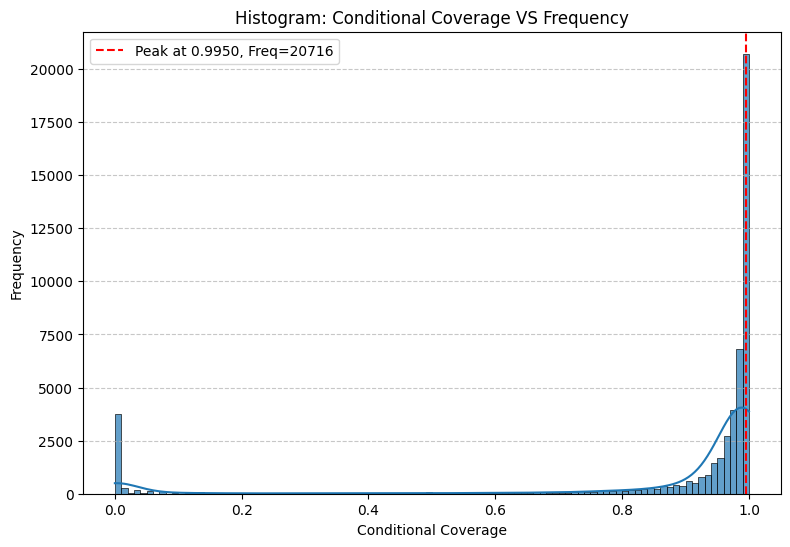

20716 (41.43%) samples reached the peak conditional coverage at 0.9950


In [4]:
raps_cifar10h_hist(model,dataset,device, lambda_=0.1, k_reg=1, num_runs=10, alpha=0.1, is_ground_truth=False)

RAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5004 ± 0.0019
Final Average Prediction Set Size: 1.05 ± 0.01
Final Average Coverage: 0.8964 ± 0.0037
Final Average Real Probability: 0.8655 ± 0.0039


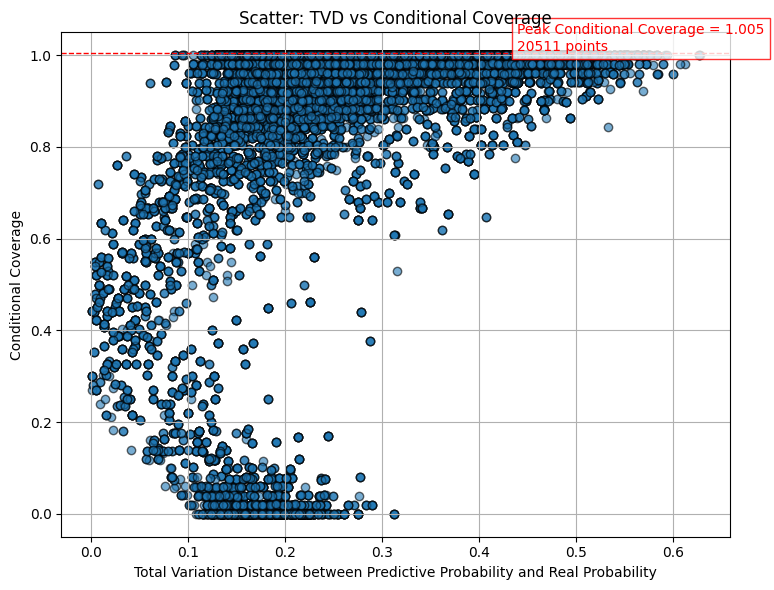

Peak Conditional Coverage = 1.005, with 20511 samples

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.60493']
  Real Probability Set      : ['0.80000']
Sample 2:
  Predictive Probability Set: ['0.82808']
  Real Probability Set      : ['1.00000']
Sample 3:
  Predictive Probability Set: ['0.66396']
  Real Probability Set      : ['0.85714']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.45847']
  Real Probability Set      : ['0.00000']
Sample 2:
  Predictive Probability Set: ['0.46490']
  Real Probability Set      : ['0.05882']
Sample 3:
  Predictive Probability Set: ['0.29482', '0.14307']
  Real Probability Set      : ['0.00000', '0.00000']

--- Region 3: medium TVD, medium Coverage ---
Sample 1:
  Predictive Probability Set: ['0.18707', '0.17591']
  Real Probability Set      : ['0.78431', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.21930', '0.10100']
  Real 

In [15]:
raps_cifar10h_scatter(model,dataset,device, lambda_=0.1, k_reg=1, num_runs=10, alpha=0.1)

SAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5298 ± 0.0043
Final Average Prediction Set Size: 0.99 ± 0.01
Final Average Coverage: 0.8989 ± 0.0063
Final Average Real Probability: 0.8674 ± 0.0064


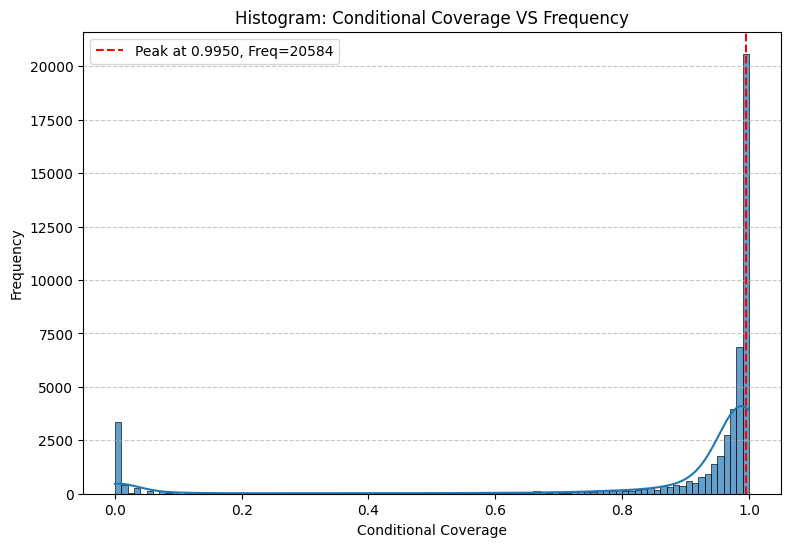

20584 (41.17%) samples reached the peak conditional coverage at 0.9950


In [3]:
saps_cifar10h_hist(model, dataset, device, lambda_=2.2, num_runs=10, alpha=0.1, is_ground_truth=False)

SAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5298 ± 0.0043
Final Average Prediction Set Size: 0.99 ± 0.01
Final Average Coverage: 0.8989 ± 0.0063
Final Average Real Probability: 0.8674 ± 0.0064


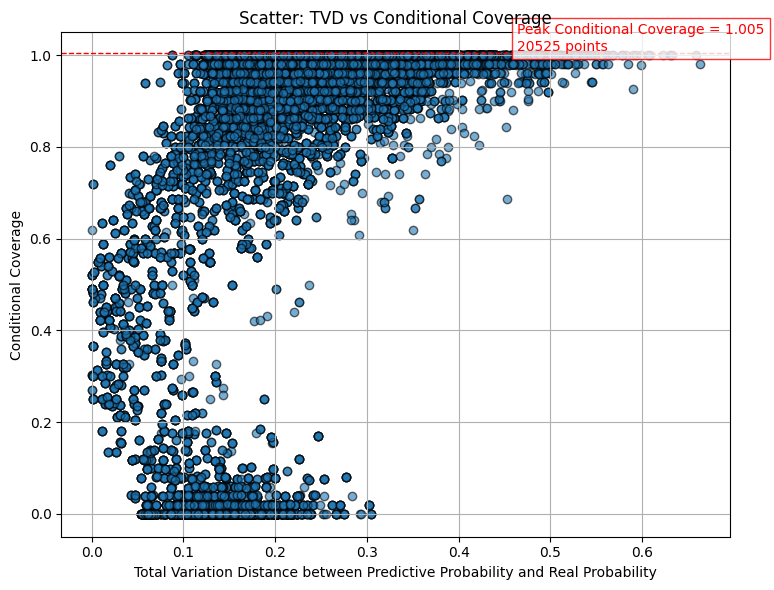

Peak Conditional Coverage = 1.005, with 20525 samples

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.64610']
  Real Probability Set      : ['0.80769']
Sample 2:
  Predictive Probability Set: ['0.76322']
  Real Probability Set      : ['0.96078']
Sample 3:
  Predictive Probability Set: ['0.62772']
  Real Probability Set      : ['0.82353']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.40428']
  Real Probability Set      : ['0.00000']
Sample 2:
  Predictive Probability Set: ['0.57155']
  Real Probability Set      : ['0.12000']
Sample 3:
  Predictive Probability Set: ['0.45264']
  Real Probability Set      : ['0.01961']

--- Region 3: medium TVD, medium Coverage ---
Sample 1:
  Predictive Probability Set: ['0.18267', '0.17401']
  Real Probability Set      : ['0.76923', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.27375', '0.22089']
  Real Probability Set      :

In [4]:
saps_cifar10h_scatter(model, dataset, device, lambda_=2.2, num_runs=10, alpha=0.1)